<a href="https://colab.research.google.com/github/campeone-pixel/soccer_database/blob/master/ProyectoDS_ParteI_%2BCannoni%2BPoses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sqlite3
import pandas as pd
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# df_games = pd.read_csv("games.csv")
# df_teams = pd.read_csv("teams.csv")
# df_teamstats = pd.read_csv("teamstats.csv")
# df_leagues = pd.read_csv("leagues.csv")
# df_appearances = pd.read_csv("appearances.csv")
# df_players = pd.read_csv("players.csv", encoding="ISO-8859-1")
# df_shots = pd.read_csv("shots.csv")


df_games = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/games.csv")
df_teams = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/teams.csv")
df_teamstats = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/teamstats.csv")
df_leagues = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/leagues.csv")
df_appearances = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/appearances.csv")
df_players = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/players.csv", encoding="ISO-8859-1")
df_shots = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/shots.csv")

# Organizamos las tablas

## Primero mergeamos las tablas de df_leagues,df_teams y df_teamstats con df_games

In [4]:
df_teamstats_away = df_teamstats.loc[df_teamstats["location"] == "a"]
df_teamstats_home = df_teamstats.loc[df_teamstats["location"] == "h"]
df_teamstats_merged = pd.merge(
    df_teamstats_home, df_teamstats_away, on="gameID", suffixes=["_home", "_away"]
)

df_games_merged_with_teamstats = pd.merge(
    df_games, df_teamstats_merged, on="gameID", suffixes=("", "_remove")
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    df_games_merged_with_teamstats.iloc[:, 13:34], axis=1
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    ["homeProbability", "drawProbability", "awayProbability"], axis=1
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    ["teamID_home", "teamID_away"], axis=1
)

df_games_merged_with_leagues = pd.merge(
    df_games_merged_with_teamstats, df_leagues, on="leagueID"
)

df_games_merged_with_team = pd.merge(
    df_games_merged_with_leagues,
    df_teams,
    left_on=["homeTeamID"],
    right_on=["teamID"],
    how="left",
)
df_games_merged_with_team = pd.merge(
    df_games_merged_with_team,
    df_teams,
    left_on=["awayTeamID"],
    right_on=["teamID"],
    how="left",
)

df_f_game = df_games_merged_with_team.rename(
    columns={"name_x": "liga", "name_y": "home_name", "name": "away_name"}
)
df_f_game = df_f_game.drop(
    [
        "understatNotation",
        "season_home",
        "date_home",
        "location_home",
        "goals_away",
        "goals_home",
        "season_away",
        "date_away",
        "location_away",
        "location_away",
        "teamID_x",
        "teamID_y",
    ],
    axis=1,
)

In [5]:
df_f_game['month'] = pd.DatetimeIndex(df_f_game['date']).month

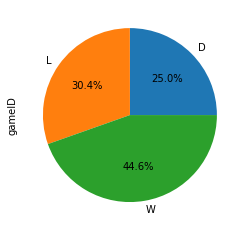

In [6]:
df_f_game.groupby(['result_home'])['gameID'].count().plot(kind = "pie",autopct='%1.1f%%')

In [7]:
df_f_game["totalGoals"]= df_f_game["homeGoals"]  + df_f_game["awayGoals"]

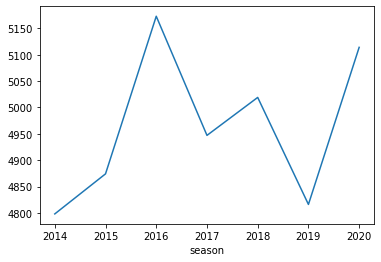

In [8]:
df_f_game.groupby(['season'])['totalGoals'].sum().plot()

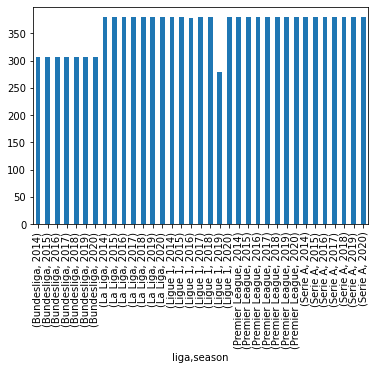

In [9]:
df_f_game.groupby(['liga','season'])['gameID'].count().plot(kind='bar')

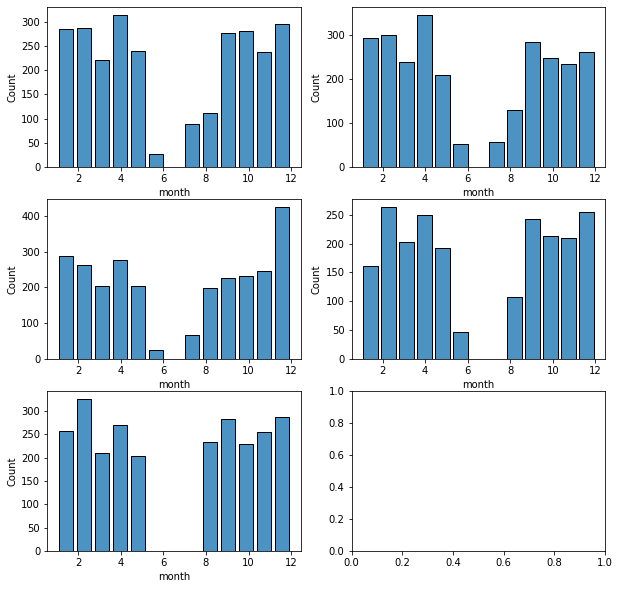

In [10]:
df_f_game_seriea=df_f_game.loc[df_f_game['liga']=="Serie A"]
df_f_game_laliga=df_f_game.loc[df_f_game['liga']=="La Liga"]
df_f_game_premier=df_f_game.loc[df_f_game['liga']=="Premier League"]
df_f_game_bundesliga=df_f_game.loc[df_f_game['liga']=="Bundesliga"]
df_f_game_ligue1=df_f_game.loc[df_f_game['liga']=="Ligue 1"]

figure, axis = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(data=df_f_game_seriea, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[0,0])
sns.histplot(data=df_f_game_laliga, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[0,1])
sns.histplot(data=df_f_game_premier, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[1,0])
sns.histplot(data=df_f_game_bundesliga, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[1,1])
sns.histplot(data=df_f_game_ligue1, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[2,0])


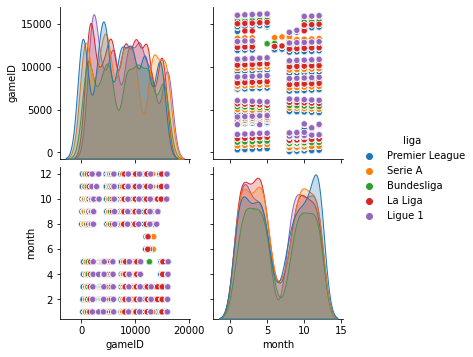

In [11]:
data=df_f_game.loc[:,["gameID","month","liga"]]
sns.pairplot(data=data, hue="liga")

In [12]:
df_appearances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356513 entries, 0 to 356512
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameID         356513 non-null  int64  
 1   playerID       356513 non-null  int64  
 2   goals          356513 non-null  int64  
 3   ownGoals       356513 non-null  int64  
 4   shots          356513 non-null  int64  
 5   xGoals         356513 non-null  float64
 6   xGoalsChain    356513 non-null  float64
 7   xGoalsBuildup  356513 non-null  float64
 8   assists        356513 non-null  int64  
 9   keyPasses      356513 non-null  int64  
 10  xAssists       356513 non-null  float64
 11  position       356513 non-null  object 
 12  positionOrder  356513 non-null  int64  
 13  yellowCard     356513 non-null  int64  
 14  redCard        356513 non-null  int64  
 15  time           356513 non-null  int64  
 16  substituteIn   356513 non-null  int64  
 17  substituteOut  356513 non-nul